# Table Operations

## Authors
B.W. Holwerda

## Learning Goals
* tables
* How to combine tables (join, left/right and inner/outer)
* a much bigger part of data science than typically credited


## Keywords
tables, join, concatenate, pandas



## Companion Content


## Summary

In physics and astronomy, we often combine information from two different data-sets to generate a new combined data that may reveal new correlations etc. 

<hr>


## Student Name and ID: Chris Stephens and 5439371



## Date: 11/29/2023

<hr>

## Table Concatenations

If you have two tables and you are already certain these are either (A) in the right order and just need to be combined into a single table with columns from both OR (b) have the same columns but both are simple extensions from each other.
In the first case, one simply adds the columns from one table to another: stack them horizontally. In case B, one would concatenate them.

## Table Combinations

Two tables can be combined provided there is a identifier in both tables *which is the same* so pandas (or astropy.tables) can combine them into a single table quickly.

There are four ways that two tables can be joined together. This is a central part to many data-science languages. 

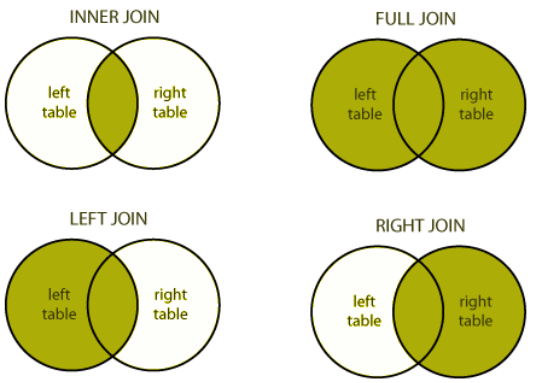

### inner/outer join

**inner join**: *only* include those entries from both tables which occur in *both*. This is the intersection of the circles in the Venn diagram. 

**full or outer join**: include all entries in either table (empty values in those columns which are unique to the other table). This is any entry in either circle of the Venn diagram.

### left/right join

This is which table takes precedence. This is the sample you're starting from or the main focus of your research. 
**left** join: all the values in the left (first specified) data-table with data from the right table with empty rows if no overlap was found. The **right** join is the reverse. Note that either one, is something between an inner and an outer join!

So it is really important to decide how to join to tables at the start of your project. There usually is a starting data-set. I know about X and I wonder if that is related to Y? X will be the left table in a left join. 




# PANDAS Tables = dataframes

Pandas calls tables of data "dataframes". Meanwhile, astropy refers to them as "tables". This can be a bit confusing but you'll find that they behave in very similar ways. 

Here we will load in csv (comma separated data files) into pandas data-frames and then merger two together. 

In [2]:
import matplotlib.pyplot as plt
from astropy.io import ascii
import numpy as np
from scipy.stats import kstest
from scipy.stats import ks_2samp
from scipy.stats import anderson
from scipy.stats import anderson_ksamp

import pandas as pd
# from astropy.table import Table, join
# can't use these!

import urllib.request


%matplotlib inline 
from matplotlib import rcParams
rcParams["savefig.dpi"] = 150
rcParams["figure.dpi"] = 150
rcParams["font.size"] = 15



# GAMA data tables

Here we dowload three GAMA data tables. These will be stored on your HD and may take up a sizeable amount of space.

For details on each of them I refer you to the GAMA schema descriptions for each:

### Sersic fits to the galaxies

The Sersic fits to the GAMA data are described here:
http://www.gama-survey.org/dr3/schema/dmu.php?id=11

SersicCatVIKING.fits (which we will save under sersic.csv) details can be found here:

http://www.gama-survey.org/dr3/schema/dmu.php?id=11

Sersic profiles are two-parameter descriptions of how the light is distributed in a galaxy (see https://en.wikipedia.org/wiki/Sersic_profile): a Sersic index n and an effective radius, the radius which encompasses half the light in the galaxy. n=1 are disk galaxies, n=4 are spheroidal or elliptical galaxies. Higher values of n are compact objects such as stars. There are measurements for both in each filter in this catalog.

### Stellar mass from optical colors

Stellar Masses can be inferred from the luminosity of galaxies, provided one knows how distant it is and what kind of stars are in the galaxy. This has been computed for the GAMA galaxies by Taylor+ (2011) and the catalogs are described here:

http://www.gama-survey.org/dr3/schema/dmu.php?id=9

with the entries in our catalog listed here for the LambdarStellarMasses.fits (which we will save as gama_stellar_mass.csv) can be found here:

http://www.gama-survey.org/dr3/schema/table.php?id=44

### Stellar masses and star-formation rate from the full range of observations

One can expand the model to include infrared and ultraviolet measurements of how much light comes from a galaxy. The model can then compute how many young stars and how much mass there is in all the stars combined. 
This is described here:

http://www.gama-survey.org/dr3/schema/dmu.php?id=15

andthe table entries described here:
http://www.gama-survey.org/dr3/schema/table.php?id=82

Note that I converted the tables astronomy file format (.fits) to a generally readable .csv file so we can all use the Pandas dataframes for these tables.


In [3]:
# Reading in the CSV catalogs and examining them
sersic = pd.read_csv("Sersic.csv") 
mass = pd.read_csv("StellarMass.csv") 
magphys = pd.read_csv("MagPhys.csv") 



### Exercise 1 - Identifying column names

Using the dataframe.head() command, we can inspect the meta-data for each table. What is the column name (case-sensitive!). What data-format (strings? float?) and in the case of astropy tables, in what units is the value expressed (if you think that is superflous, ask NASA about the Mars Orbiter...)

In [4]:
# student work here
# Let's see what this looks like eh?
sersic.head()

,CATAID,RA,DEC,R_PETRO,SURVEY_OLDCLASS,SURVEY_CLASS,CENFLUX_Z,BACKFLUX_Z,PSFNUM_Z,PSFCHI2_Z,...,GALMUEAVG_K,GALR90_K,GALCHI2FULL_K,GALNDOF_K,GALCHI2_K,GALPLAN_K,PRICHI2FULL_K,PRINFP_K,PRINDOF_K,PRICHI2_K
0,6802,174.005984,0.720935,18.622816,7,6,1105.783569,-0.381632,42,1.09,...,19.233870,1.922486,10091.476562,10194,0.989943,1,143.224365,7,95,1.507625
1,6803,174.021648,0.754885,19.219088,6,6,1404.295044,-0.210685,25,1.01,...,17.242867,1.900632,11649.028320,10187,1.143519,1,124.993767,7,80,1.562422
2,6804,174.092055,0.674096,19.341200,6,6,827.092773,-2.251491,19,1.17,...,18.550535,1.660863,12483.344727,10144,1.230614,1,92.913406,7,72,1.290464
3,6805,174.022355,0.702532,19.301096,6,6,1213.812134,0.463317,25,1.05,...,16.670053,1.702121,10882.777344,10166,1.070507,1,80.444397,7,67,1.200663
4,6806,174.022807,0.705945,18.544878,7,6,884.915222,0.049662,44,1.03,...,19.304634,4.913909,10188.407227,10180,1.000826,1,611.055786,7,206,2.966290


### Exercise 2 - Identifying the common column name

Using the dataframe.head() command, *which* column name do all three catalogs have in common. Use the len command to see how long each table is. Are they the same length? Could we plot one column from one table against one from another?

Using the dataframe.info() command, what can you say about the data size? 

In [2]:
# print(sersic.info)
# print(mass.info)
# Let's see what this looks like eh?


In [3]:
# student work here


### 2a -- evaluating your catalogs

Are all three catalogs of equal length? Could we plot one column from one table against one from another?
Why would they differ?

*write your answers here*

### Exercise 3 - Joining GAMA catalogs

The first exercise is to join two GAMA tables (dataframes) and check how big the resulting table (dataframe) is. 

Joining data-frames (where these tables of information now live in) can be done with panda's *merge* function. 

https://pandas.pydata.org/docs/user_guide/merging.html

What kind of merging (joining) is done by default?

the *on* keyword for the join is to tell it which column name it should join on. If the columns are called something different (they are the same here), then two keys can be provided in *left_on* and *right_on* (insert joke here). 

Check what the final combined tabel/dataframe looks like.

In [4]:
# student work


In [ ]:
# student work here


### Exercise 4 - Plot values from both catalogs

can we plot the stellar mass from the mass catalog ('logmstar') column and the Sersic index in the J-band filter from the Sersic catalog from out joined new table?

hint: use xlim and ylim to set the ranges to physical values (stellar mass is from $10^9 - 10^{13}$ solar masses, Sersic indices are between 0 and 10

In [5]:
# student work here


Text(0, 0.5, 'Effective Radius in J (")')

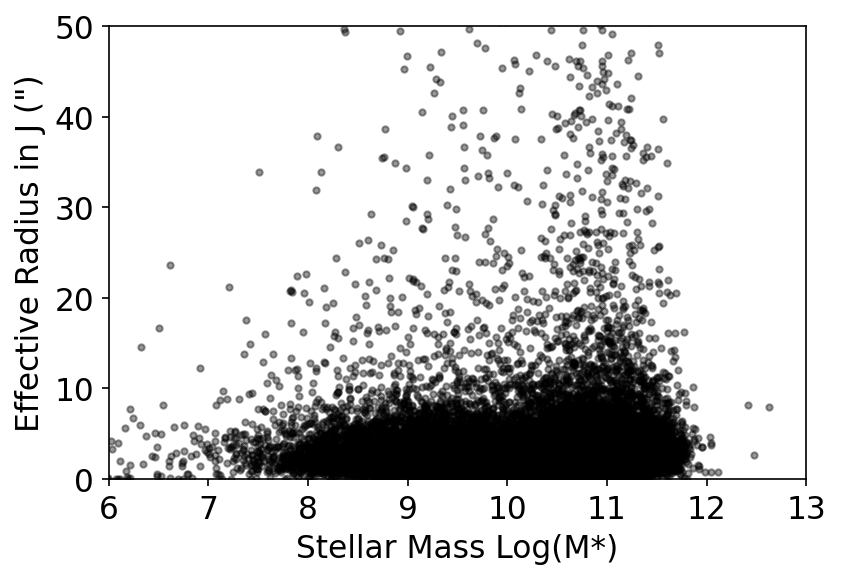

In [21]:
# student work here


### Exercise 5 -- Sample sizes

Joining left/right does the length of the final table change? 

In [6]:
#student work


*your answer here*

### Exercise 6 --  Make two versions of the stellar-mass - Effective Radius plot (the size-mass relation)

* the effective radius comes from the Sersic fits catalog
* the stellar mass can come from either the Stellar masses catalog or the Magphys catalog
* NOTE if the catalog is in log10 values or absolute values!


In [7]:
# student work


In [8]:
# student work


*your answer here*

### Exercise 7 -- Make the stellar-mass star-formation rate plot with Sersic N as the color

* stellar mass and star-formation rate from magphys
* Sersic index as the color
* with a color bar.
* HINT: if the color too uniform? use the np.log10() for the color?

What do you notice about the star-formation as a function of mass? How many distinct groups can you identify?


In [9]:
# student work


*your answer here*

### Exercise 8 -- Stellar Mass 

Join the StellarMassLambdar catalog and the Magphys catalogs and compare the difference in stellar masses as a funcion of the stellar mass (from one of these catalogs).


In [10]:
# student work


In [11]:
# student work


### Exercise 9 -- Correlations

Which characteristics correlate and how much? 

Use the pearson ranking to compare stellar mass, effective radius, Sersic index and star-formation rate.

Which two catalogs is this the easiest to get out? How big is the sample? And how significant are the correlations? What happens if we correlate log10 values of SFR and stellar mass?

In [12]:
# student work
